In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.utils import to_categorical
import os
from keras.preprocessing.image import ImageDataGenerator, load_img

In [23]:
from keras.applications import VGG16

vgg_conv = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [24]:
vgg_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [25]:
train_dir = './clean-dataset/train'
validation_dir = './clean-dataset/validation'

nTrain = 600
nVal = 150

In [58]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

train_features = np.zeros(shape=(nTrain, 7, 7, 512))
train_labels = np.zeros(shape=(nTrain,3))

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

i = 0
for inputs_batch, labels_batch in train_generator:
    features_batch = vgg_conv.predict(inputs_batch)
    train_features[i * batch_size : (i + 1) * batch_size] = features_batch
    train_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= nTrain:
        break
        
train_features = np.reshape(train_features, (nTrain, 7 * 7 * 512))

Found 600 images belonging to 3 classes.


In [27]:
validation_features = np.zeros(shape=(nVal, 7, 7, 512))
validation_labels = np.zeros(shape=(nVal,3))

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

i = 0
for inputs_batch, labels_batch in validation_generator:
    features_batch = vgg_conv.predict(inputs_batch)
    validation_features[i * batch_size : (i + 1) * batch_size] = features_batch
    validation_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= nVal:
        break

validation_features = np.reshape(validation_features, (nVal, 7 * 7 * 512))

Found 150 images belonging to 3 classes.


### Create your own model and train the network

In [28]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=7 * 7 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features,
                    train_labels,
                    epochs=20,
                    batch_size=batch_size,
                    validation_data=(validation_features,validation_labels))

Train on 600 samples, validate on 150 samples
Epoch 1/20
600/600 [==============================] - 0s 733us/step - loss: 1.9914 - acc: 0.5783 - val_loss: 0.4183 - val_acc: 0.8333
Epoch 2/20
600/600 [==============================] - 0s 720us/step - loss: 0.4985 - acc: 0.8083 - val_loss: 0.8501 - val_acc: 0.6867
Epoch 3/20
600/600 [==============================] - 0s 788us/step - loss: 0.2946 - acc: 0.8800 - val_loss: 0.5263 - val_acc: 0.8267
Epoch 4/20
600/600 [==============================] - 0s 804us/step - loss: 0.2261 - acc: 0.9200 - val_loss: 0.3696 - val_acc: 0.8667
Epoch 5/20
600/600 [==============================] - 0s 719us/step - loss: 0.1661 - acc: 0.9400 - val_loss: 0.6843 - val_acc: 0.7733
Epoch 6/20
600/600 [==============================] - 0s 680us/step - loss: 0.1033 - acc: 0.9700 - val_loss: 0.9556 - val_acc: 0.7533
Epoch 7/20
600/600 [==============================] - 0s 745us/step - loss: 0.0574 - acc: 0.9767 - val_loss: 0.3597 - val_acc: 0.8933
Epoch 8/20
600/6

In [29]:
fnames = validation_generator.filenames

ground_truth = validation_generator.classes

label2index = validation_generator.class_indices

# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())

In [30]:
predictions = model.predict_classes(validation_features)
prob = model.predict(validation_features)

In [31]:
errors = np.where(predictions != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),nVal))

No of errors = 16/150


### Let us see which images were predicted wrongly

Original label:pumpkin, Prediction :watermelon, confidence : 0.577


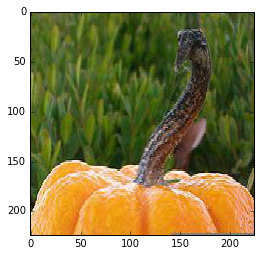

Original label:tomato, Prediction :pumpkin, confidence : 1.000


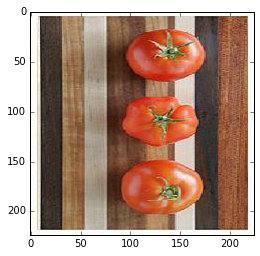

Original label:tomato, Prediction :pumpkin, confidence : 1.000


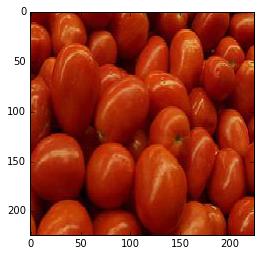

Original label:tomato, Prediction :pumpkin, confidence : 0.985


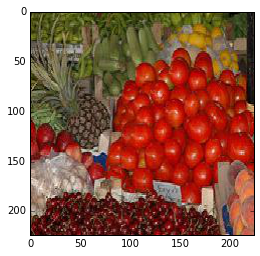

Original label:tomato, Prediction :pumpkin, confidence : 0.836


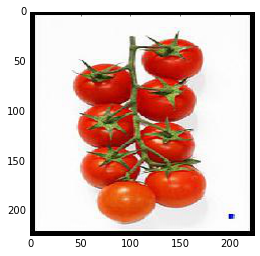

Original label:tomato, Prediction :watermelon, confidence : 1.000


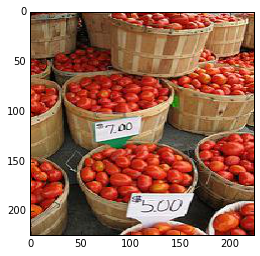

Original label:tomato, Prediction :pumpkin, confidence : 0.998


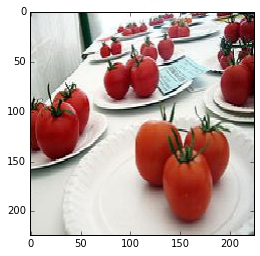

Original label:tomato, Prediction :pumpkin, confidence : 1.000


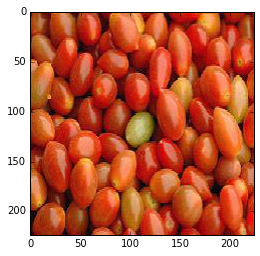

Original label:tomato, Prediction :pumpkin, confidence : 0.791


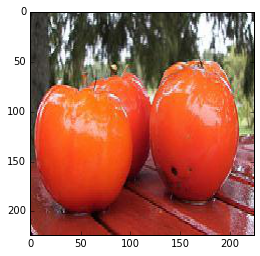

Original label:tomato, Prediction :pumpkin, confidence : 0.607


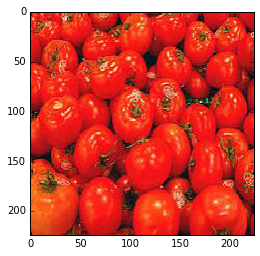

Original label:watermelon, Prediction :pumpkin, confidence : 0.973


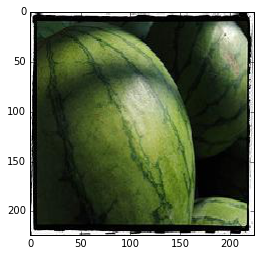

Original label:watermelon, Prediction :pumpkin, confidence : 0.693


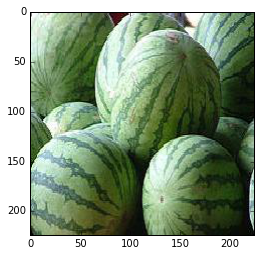

Original label:watermelon, Prediction :pumpkin, confidence : 0.979


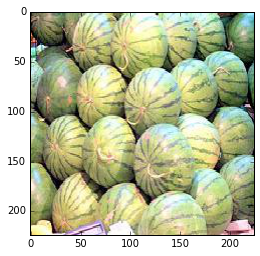

Original label:watermelon, Prediction :pumpkin, confidence : 1.000


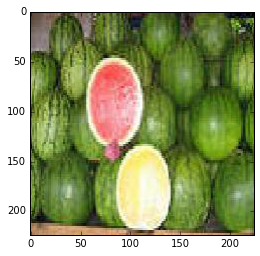

Original label:watermelon, Prediction :pumpkin, confidence : 1.000


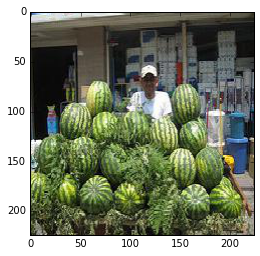

Original label:watermelon, Prediction :pumpkin, confidence : 0.604


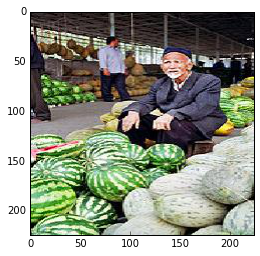

In [32]:
for i in range(len(errors)):
    pred_class = np.argmax(prob[errors[i]])
    pred_label = idx2label[pred_class]
    
    print('Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        prob[errors[i]][pred_class]))
    
    original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.imshow(original)
    plt.show()